# 大鱼论坛bbs
## url **http://bbs.fxdayu.com**
## HTML、CSS**http://www.w3school.com.cn/html/index.asp**
## BeautifulSoup4 简介 **https://blog.csdn.net/love666666shen/article/details/77512353**

# requests库
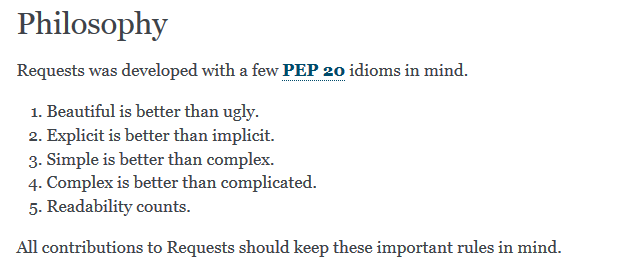

In [50]:
import requests
r=requests.get("http://bbs.fxdayu.com")

In [51]:
print(r.text)



<!doctype html>
<html>
  <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <title>最近活动的主题 - 大鱼社区</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta name="apple-mobile-web-app-capable" content="yes" />
    <meta name="msapplication-tap-highlight" content="no" />

    <link rel="stylesheet" href="/static/spirit/stylesheets/vendors/font-awesome.min.517da4b1429b.css">
    <link rel="stylesheet" href="/static/spirit/stylesheets/styles.all.min.9c8405da845e.css">

    <script src="/static/spirit/scripts/all.min.b131515b8957.js"></script>
    <script src="/static/spirit/scripts/js/like.no-min.fa861147d917.js"></script>

    <script>

	$( document ).ready(function() {

        $.tab();

        $( 'a.js-post' ).postify( {
            csrfToken: "6ouFpOT7wAmfUW6vvh1BMyWbuVJdoBzTKeyg8HTmiJh3VRBP

In [52]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
bsObj=BeautifulSoup(r.text)

In [53]:
topics=bsObj.findAll("div",{"class":"row"})
name_list=[]

In [54]:
info=[]
for topic in topics:
#     print(topic)
    name=topic.find("a",{"class":"username"})
    title=topic.find("a",{"class":"row-link row-title-link"})
    content=topic.find_all("p")[1].text
    if  name and title:
        name=name.text
        title=title.text
    else :
        continue
    name_list.append(name)
    info.append((name,title,content))

In [55]:
import pandas as pd
pd.set_option("display.width",300)
pd.set_option("display.max_colwidth",1000)
df=pd.DataFrame(info,columns=["name","title","content"])
df=df.set_index("name")
df=df.sort_index()
df["content"]=df["content"].map(lambda x:x.replace("\r\n"," "))
df["content"]=df["content"].map(lambda x:x.replace("\t"," "))

In [56]:
df.loc["Channel_CMT"]

,title,content
name,,
Channel_CMT,ML_Install_Error,jaqs: pip install git+https://github.com/xingetouzi/jaqs-fxdayu.git@localds pip: python -m pip install pip==9.0.1 python -m pip install pip==9.0.1 -i https://pypi.douban.com/simple rqalpha: pip install rqalpha==3.0.9 pip install rqalpha==3.0.9 -i https://pypi.douban.com/simple
Channel_CMT,实现简单的统计套利策略模板,简单配对交易策略逻辑 配对交易即是考察两个品种之间的价格差，在假定价格差是平稳序列的情况下，当观测到价格差往某一个方向偏离时反向操作。 ## 第一步，通过tick数据得到两个品种的价格： 使用tick数据合成品种10s，1min，5min等的bar数据，获得品种历史价格序列 ## 第二步，计算品种的价格差和beta： 最简单的做法是使用两个品种的价格直接做差，在得到的序列不平稳的情况下也会选择先分别计算两个品种的收益率（或对数收益率），再将收益率做差。 因为各式各样的原因，两个品种的价格差有可能均值不为0，所以在获得价格差序列时会引入beta，即： 品种1的价格 - beta * 品种2的价格 = 价差 ## 第三步，通过价格差计算合理方差： 计算合理方差有几种办法，最简单的是选择直接计算价差序列的标准差，将估计的标准差作为未来一段时间内真实的标准差。 ## 第四步，通过标准差进行交易。 假定价差是由品种1-beta份品种2得到的，当价差向上突破给定倍数的标准差时（默认为2倍），可以认为价差在未来有很大概率回归，此时做空品种1，做多beta份品种2，待价差回归到0时平仓。价差向下突破给定倍数的标准差时反之。
Channel_CMT,Tick数据跨平台价差交易,提供了biance/huobip/bitfinex的三天Tick数据。 需要监控btc.ustd的Tick在不同平台间的价差，当价差大于100美金时进行套利交易，并持有至价差在10美金平仓。 问题1： Tick数据怎么按照时间监控，成交是在什么档进行撮合？ 问题2： 如何对Tick进行价差计算，并针对价差编写策略？ 问题3： 如何对价差策略进行合理回测？
Channel_CMT,讲师筛选,自己准备一个千聊直播间，开一个直播，把PPT图片弄上去 1.5分钟介绍高中的Python基础你觉得要怎么教 2.10-15分钟讲一个知识点，IC与Quantile， 或者， Distribution与Probability 3.发给Channel审听，随后会有点评与是否录取的通知 4.通过后需要安排三个半小时内容，有讲师费与当周包住宿 DDL: 6.16，没收到的人自动放弃 Channel
Channel_CMT,activeSymbol下单的Bug,1. 在OnTick方法下面的activeSymbol无法下单？ ![TickActiveSymbol.png](/media/spirit/images/11/28463a4a25d8f4674179b2da0cba1d06.png) 2. 把activeSymbol的下单条件改到OnTrade方法下没有执行？这个没有报错，就是没有输出。 ![TradeActiveSymbol.png](/media/spirit/images/11/6dec5fecb82c9ad936a11ed333aacfb5.png)
Channel_CMT,因子复现相关链接,Spearman数据：https://pan.baidu.com/s/1-kY1N-amuaI0QX61nKJelg 一起来复现： https://yiqixie.com/s/home/fcABFN7VGo00k_IqTbyRtL5WA Github地址: https://github.com/ChannelCMT/HelloGit


In [57]:
df.to_html("fxdayu.html")

In [58]:
#http://www.heibanke.com/lesson/crawler_ex00/

In [59]:
#re正则表达式

re 正则表达式 菜鸟教程**http://www.runoob.com/python/python-reg-expressions.html**
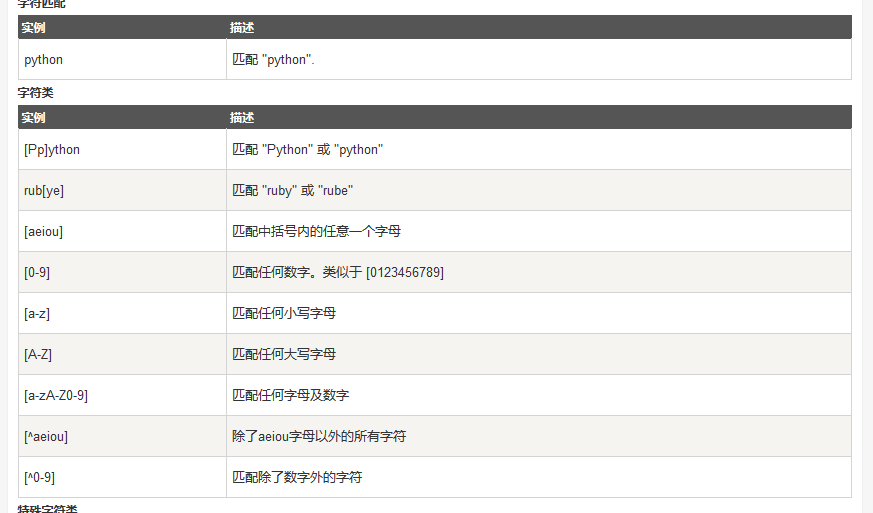

In [13]:
base_url="http://www.heibanke.com/lesson/crawler_ex00/"
r=requests.get(base_url)

In [14]:
import re
count=1
import time
import sys
start=time.time()
def get_next(r):
    number=re.search("<h3>.*?([0-9]+).*?</h3>",r.text).group(1)
    global count
    count+=1
#     print(count)
    print(number)
    url=base_url+number
    return url
while True:
    try:
        url=get_next(r)
        r=requests.get(url)
    except:
        end_time=time.time()
        print("运行了%ds"%(end_time-start))
        break
        

53639
10963
65392
36133
72324
57633
91251
87016
77055
30366
83679
31388
99446
69428
34798
16780
36499
21070
96749
71822
48739
62816
80182
68171
45458
56056
87450
52695
36675
25997
73222
93891
29052
72996
73999
23814
98084
51103
39603
34316
55719
53685
77771
69187
89677
71935
98538
79152
70999
35102
运行了99s


Cookie 在计算机中是个存储在浏览器目录中的文本文件，当浏览器运行时，存储在 RAM 中发挥作用 （此种 Cookies 称作 Session Cookies），一旦用户从该网站或服务器退出，Cookie 可存储在用户本地的硬盘上 （此种 Cookies 称作 Persistent Cookies） 。

通常情况下，当用户结束浏览器会话时，系统将终止所有的 Cookie。当 Web 服务器创建了Cookies 后，只要在其有效期内，当用户访问同一个 Web 服务器时，浏览器首先要检查本地的Cookies，并将其原样发送给 Web 服务器。这种状态信息称作“Persistent Client State HTTP Cookie” ，简称为 Cookies。

Cookie 是在 HTTP 协议下，服务器或脚本可以维护客户工作站上信息的一种方式。Cookie 是由 Web 服务器保存在用户浏览器（客户端）上的小文本文件，它可以包含有关用户的信息。无论何时用户链接到服务器，Web 站点都可以访问 Cookie 信息 。
目前有些 Cookie 是临时的，有些则是持续的。临时的 Cookie 只在浏览器上保存一段规定的时间，一旦超过规定的时间，该 Cookie 就会被系统清除。
持续的 Cookie 则保存在用户的 Cookie 文件中，下一次用户返回时，仍然可以对它进行调用。在 Cookie 文件中保存 Cookie，有些用户担心 Cookie 中的用户信息被一些别有用心的人窃取，而造成一定的损害。其实，网站以外的用户无法跨过网站来获得 Cookie 信息。如果因为这种担心而屏蔽 Cookie，肯定会因此拒绝访问许多站点页面。因为，当今有许多 Web 站点开发人员使用 Cookie 技术，例如 Session 对象的使用就离不开 Cookie 的支持。                                                                                                                                                                                               ----来自百度百科

In [15]:
import requests
cookies={"csrftoken":"**","messages":'"',"sessionid":""}#填上你自己的cookies信息
r=requests.get("http://www.fxdayu.com",cookies=cookies)
r=requests.get("http://www.fxdayu.com/navbar/top/account?t=1533078863",cookies=cookies)

In [19]:
# r.text
r=requests.get("http://www.fxdayu.com/tutorials/docs/17/",cookies=cookies)
dataS=r.json()

In [20]:
import os
base_url="http://www.fxdayu.com/tutorials/doc_content/"
if not os.path.exists("channel"):
    os.mkdir("channel")
os.chdir("channel")
for d in dataS:
    id_=str(d["id"])
    title=d["title"]
    url=base_url+id_
    print(url)
    r=requests.get(url,cookies=cookies)
    print(id_)
    print(r.json()["zy_url"])
    print(title)
    article_url=(r.json())["zy_url"]
    r=requests.get(article_url)
    with open(title+".html","w",encoding="utf-8") as f:
        f.write(r.text)

http://www.fxdayu.com/tutorials/doc_content/237
237
https://www.zybuluo.com/Channelchan/note/1065836
Fxdayu数据分析与研究环境安装
http://www.fxdayu.com/tutorials/doc_content/186
186
https://www.zybuluo.com/Channelchan/note/1066051
环境安装_Windows64位
http://www.fxdayu.com/tutorials/doc_content/182
182
https://www.zybuluo.com/Channelchan/note/1066199
环境安装_OSX
http://www.fxdayu.com/tutorials/doc_content/75
75
https://www.zybuluo.com/Channelchan/note/644580
Python 基础语法
http://www.fxdayu.com/tutorials/doc_content/76
76
https://www.zybuluo.com/Channelchan/note/644599
Python 数据类型
http://www.fxdayu.com/tutorials/doc_content/78
78
https://www.zybuluo.com/Channelchan/note/644606
Python 数据运算
http://www.fxdayu.com/tutorials/doc_content/66
66
https://www.zybuluo.com/Channelchan/note/644637
Python 流程控制
http://www.fxdayu.com/tutorials/doc_content/79
79
https://www.zybuluo.com/Channelchan/note/644646
Python 函数设计
http://www.fxdayu.com/tutorials/doc_content/73
73
https://www.zybuluo.com/Channelchan/note/644665
Python